# Analyzing Chicago Crime Data

Below you will find an analysis about reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2015 to 2017. 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import os
import json
%matplotlib inline

In [2]:
data_filename ='data/Crimes_-_2015-2017.csv'

In [3]:
df = pd.read_csv(data_filename,parse_dates=['Date','Updated On'])

In order to present a month level analysis, we need to isolate Months from each date.

In [10]:
df['Months']=pd.to_datetime(df['Date'],infer_datetime_format=True).dt.month



Using a pivot table, our data are organized to the appropriate form. Each Primary type is placed at vertical columns and each month at horizontal. Knowing that ID is a unique number of each crime, we calculate the summary of IDs per crime type and month. 

In [87]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Months,Hours
0,10000092,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,04B,1144606.0,1903566.0,2015,2018-02-10 15:50:01,41.891399,-87.744385,"(41.891398861, -87.744384567)",3,19
1,10000094,HY190059,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,26,1166468.0,1860715.0,2015,2018-02-10 15:50:01,41.773372,-87.665319,"(41.773371528, -87.665319468)",3,23
2,10000095,HY190052,2015-03-18 22:45:00,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,08B,1185075.0,1875622.0,2015,2018-02-10 15:50:01,41.813861,-87.596643,"(41.81386068, -87.596642837)",3,22
3,10000096,HY190054,2015-03-18 22:30:00,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,08B,1178033.0,1870804.0,2015,2018-02-10 15:50:01,41.800802,-87.622619,"(41.800802415, -87.622619343)",3,22
4,10000097,HY189976,2015-03-18 21:00:00,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,03,1144920.0,1898709.0,2015,2018-02-10 15:50:01,41.878065,-87.743354,"(41.878064761, -87.743354013)",3,21


In [88]:
df_per_month = df.pivot_table(index='Months', 
                                columns='Primary Type',
                                values='ID',
                                aggfunc='count')


df_per_month

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Months,,,,,,,,,,,,,,,,,,,,,
1,97.0,3820.0,10830.0,3521.0,8.0,393.0,6721.0,1612.0,4558.0,9.0,...,1.0,4382.0,337.0,2.0,409.0,2914.0,295.0,43.0,13839.0,779.0
2,91.0,3618.0,9821.0,2516.0,8.0,301.0,5640.0,1403.0,4245.0,15.0,...,1.0,3927.0,241.0,3.0,347.0,1945.0,200.0,32.0,11624.0,732.0
3,109.0,4563.0,12271.0,2826.0,9.0,335.0,7013.0,1631.0,4544.0,42.0,...,1.0,4583.0,235.0,1.0,516.0,2185.0,215.0,47.0,13432.0,923.0
4,135.0,4542.0,12247.0,2835.0,9.0,359.0,7308.0,1629.0,4489.0,77.0,...,1.0,4480.0,305.0,2.0,499.0,2300.0,207.0,49.0,13923.0,981.0
5,134.0,5317.0,14166.0,3242.0,13.0,380.0,7851.0,1776.0,4235.0,83.0,...,NaN,4893.0,299.0,7.0,539.0,2595.0,260.0,44.0,15320.0,1037.0
6,126.0,5263.0,14077.0,3300.0,13.0,422.0,7686.0,1813.0,4473.0,90.0,...,3.0,4408.0,262.0,3.0,532.0,2654.0,286.0,42.0,16159.0,1103.0
7,132.0,5124.0,13965.0,3712.0,13.0,447.0,8553.0,1731.0,4440.0,92.0,...,3.0,4606.0,242.0,2.0,521.0,3048.0,302.0,50.0,17303.0,1191.0
8,129.0,5096.0,13632.0,3774.0,15.0,431.0,8343.0,1753.0,4590.0,126.0,...,2.0,4577.0,283.0,3.0,473.0,3342.0,263.0,40.0,18092.0,1098.0
9,117.0,5010.0,12980.0,3593.0,11.0,401.0,7780.0,1605.0,4466.0,88.0,...,2.0,4015.0,173.0,3.0,475.0,2961.0,285.0,62.0,16434.0,1067.0


In order to perform a useful and observable plot, we create the crime type "Others" which includes crime types with frequency lower than 2000. However, we remove from pivot table the aforementioned crime types.

In [89]:
df_per_month['OTHERS'] = df_per_month[df_per_month<2000].sum(axis=1)
df_per_month=df_per_month[df_per_month>=2000]

Rows and columns with NaN values are removed too.

In [90]:
df_per_month=df_per_month.dropna(axis='columns',how='all')
df_per_month=df_per_month.dropna(axis='rows',how='all')

In [91]:
df_per_month=df_per_month.sort_values(by=[1], ascending=False, axis=1)
df_per_month

Primary Type,THEFT,BATTERY,CRIMINAL DAMAGE,OTHERS,DECEPTIVE PRACTICE,NARCOTICS,OTHER OFFENSE,ASSAULT,BURGLARY,MOTOR VEHICLE THEFT,ROBBERY
Months,,,,,,,,,,,
1,13839.0,10830.0,6721.0,5360.0,4558.0,4455.0,4382.0,3820.0,3521.0,2983.0,2914.0
2,11624.0,9821.0,5640.0,6294.0,4245.0,4223.0,3927.0,3618.0,2516.0,2343.0,NaN
3,13432.0,12271.0,7013.0,5271.0,4544.0,5052.0,4583.0,4563.0,2826.0,2367.0,2185.0
4,13923.0,12247.0,7308.0,5373.0,4489.0,4579.0,4480.0,4542.0,2835.0,2319.0,2300.0
5,15320.0,14166.0,7851.0,5831.0,4235.0,4486.0,4893.0,5317.0,3242.0,2506.0,2595.0
6,16159.0,14077.0,7686.0,6039.0,4473.0,3977.0,4408.0,5263.0,3300.0,2855.0,2654.0
7,17303.0,13965.0,8553.0,5938.0,4440.0,4168.0,4606.0,5124.0,3712.0,2921.0,3048.0
8,18092.0,13632.0,8343.0,5906.0,4590.0,3939.0,4577.0,5096.0,3774.0,2949.0,3342.0
9,16434.0,12980.0,7780.0,5482.0,4466.0,3959.0,4015.0,5010.0,3593.0,2758.0,2961.0


Finally, a bar plot is created, using the pivot table.

It is obvious that the biggest frequency of crime was performed in July and August. Another significant fact is that the top 3 of crime types were "Simple","Domestic Battery Simple" and "$500 and Under"

<Figure size 432x288 with 0 Axes>

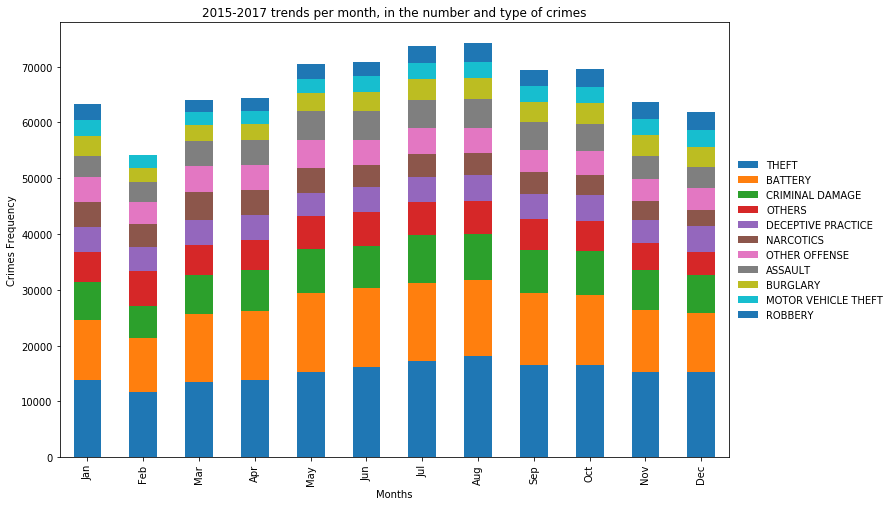

In [98]:
f = plt.figure()
df_per_month.plot(kind='bar',
              title='2015-2017 trends per month, in the number and type of crimes',
              figsize =(12,8),
              stacked=True)
plt.ylabel('Crimes Frequency')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),frameon=False)

# Pivot Per Hour

In [92]:
df['Hours']=pd.to_datetime(df['Date'],infer_datetime_format=True).dt.hour
df_per_hour = df.pivot_table(index='Hours', 
                                columns='Primary Type',
                                values='ID',
                                aggfunc='count')

In [93]:
df_per_hour['OTHERS']=df_per_hour[df_per_hour<2000].sum(axis=1)
df_per_hour=df_per_hour[df_per_hour>=2000]
df_per_hour=df_per_hour.dropna(axis='columns',how='all')
df_per_hour=df_per_hour.dropna(axis='rows',how='all')
df_per_hour=df_per_hour.sort_values(by=[12],ascending=False,axis=1)

<Figure size 432x288 with 0 Axes>

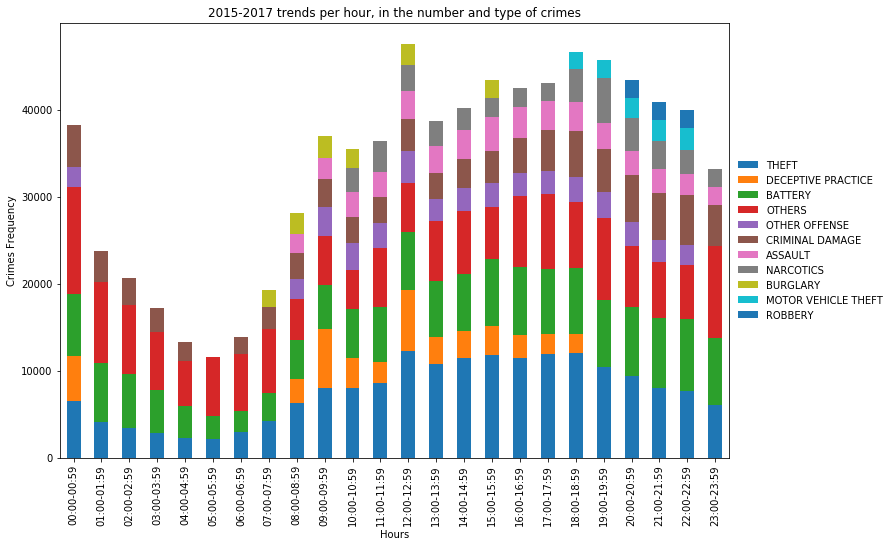

In [94]:
f = plt.figure()
df_per_hour.plot(kind='bar',
              title='2015-2017 trends per hour, in the number and type of crimes',
              figsize =(12,8),
              stacked=True)
plt.ylabel('Crimes Frequency')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['00:00-00:59',
'01:00-01:59',
'02:00-02:59',
'03:00-03:59',
'04:00-04:59',
'05:00-05:59',
'06:00-06:59',
'07:00-07:59',
'08:00-08:59',
'09:00-09:59',
'10:00-10:59',
'11:00-11:59',
'12:00-12:59',
'13:00-13:59',
'14:00-14:59',
'15:00-15:59',
'16:00-16:59',
'17:00-17:59',
'18:00-18:59',
'19:00-19:59',
'20:00-20:59',
'21:00-21:59',
'22:00-22:59',
'23:00-23:59'])
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),frameon=False)

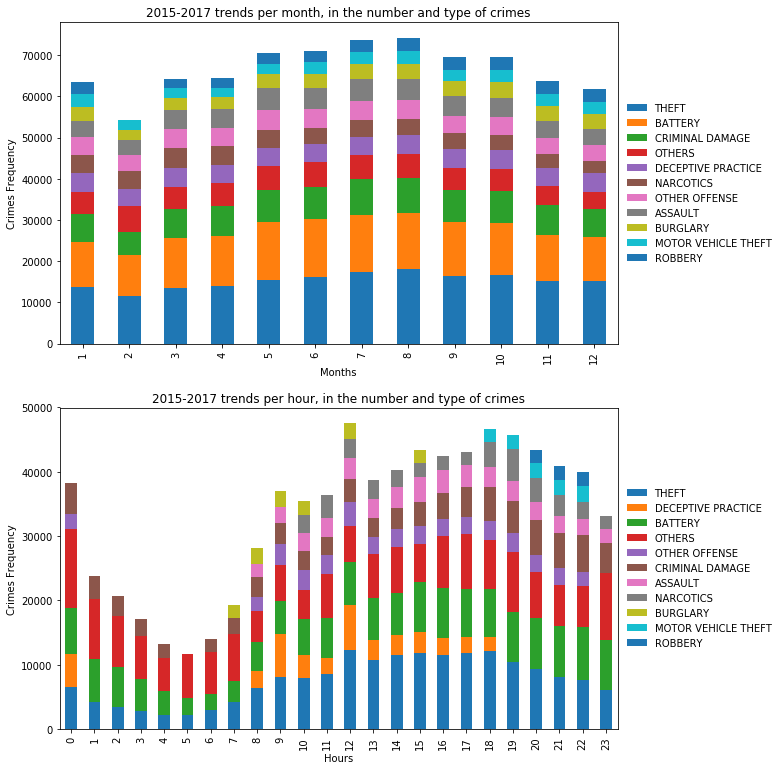

In [95]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=1)
df_per_month.plot(kind='bar',
              title='2015-2017 trends per month, in the number and type of crimes',
              figsize =(10,13),
              stacked=True,
              ax=axes[0] )
axes[0].set_ylabel('Crimes Frequency')
axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5),frameon=False)
axes[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
df_per_hour.plot(kind='bar',
              title='2015-2017 trends per hour, in the number and type of crimes',
              figsize =(10,13),
              stacked=True,
                ax=axes[1])
"""
axes[1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['00:00-00:59',
'01:00-01:59',
'02:00-02:59',
'03:00-03:59',
'04:00-04:59',
'05:00-05:59',
'06:00-06:59',
'07:00-07:59',
'08:00-08:59',
'09:00-09:59',
'10:00-10:59',
'11:00-11:59',
'12:00-12:59',
'13:00-13:59',
'14:00-14:59',
'15:00-15:59',
'16:00-16:59',
'17:00-17:59',
'18:00-18:59',
'19:00-19:59',
'20:00-20:59',
'21:00-21:59',
'22:00-22:59',
'23:00-23:59'])
"""
axes[1].set_ylabel('Crimes Frequency')
lgd=axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5),frameon=False)
#plt.savefig('myfile.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')
#plt.close()

# Plotting Heatmaps 

In [96]:
df_per_month_2 = df.pivot_table(index='Primary Type', 
                                columns='Months',
                                values='ID',
                                aggfunc='count')
df_per_month_2.loc['OTHERS']=df_per_month_2[df_per_month_2<2000].sum(axis=0)
df_per_month_2=df_per_month_2[df_per_month_2>=2000]
df_per_month_2=df_per_month_2.dropna(axis='columns',how='all')
df_per_month_2=df_per_month_2.dropna(axis='rows',how='all')
df_per_month_2=df_per_month_2.sort_values(by=[5], ascending=False, axis=0)


([<matplotlib.axis.XTick at 0x163286bbbe0>,
 <a list of 12 Text xticklabel objects>)

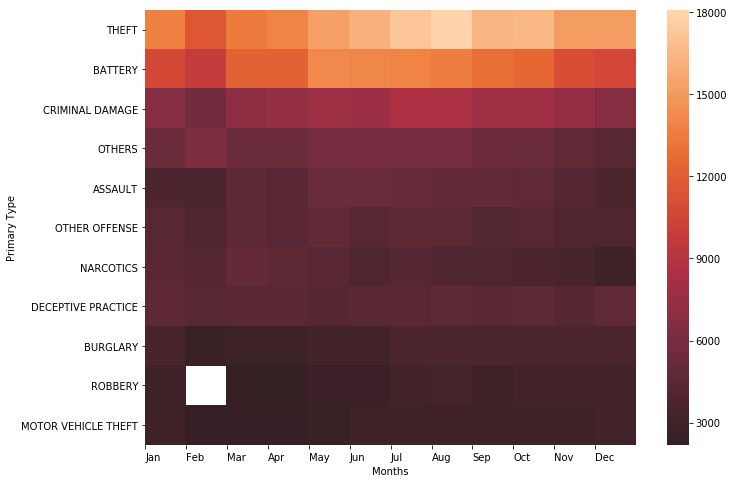

In [97]:
f = plt.figure(figsize=(11,8))
p1 = sns.heatmap(df_per_month_2, center=0)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],ha='left')

# Plotting Geo Data

https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r


In [29]:
chicago_police_districts=os.path.join('data','Boundaries - Police Districts (current).geojson')
state_crime_trends = os.path.join('data', 'Crimes_-_2015-2017.csv')
state_data = pd.read_csv(state_crime_trends)


In [30]:
df_grouped=state_data.groupby(['District']).ID.agg('count')
df_district=df_grouped.to_frame().reset_index()

df_district['District']=df_district['District'].astype(int)
df_district['District']=df_district['District'].astype(str)

In [31]:

m = folium.Map(location=[41.881832, -87.623177])

m.choropleth(
    geo_data=chicago_police_districts,
    name='choropleth',
    data=df_district,
    columns=['District','ID'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of incidents per district'
)


folium.LayerControl().add_to(m)

m

In [32]:
df_arr= state_data[state_data.Arrest==False]

In [33]:
df_grouped=df_arr.groupby(['District']).ID.agg('count')
df_dis_arr=df_grouped.to_frame().reset_index()

df_dis_arr['District']=df_dis_arr['District'].astype(int)
df_dis_arr['District']=df_dis_arr['District'].astype(str)

In [34]:

m = folium.Map(location=[41.881832, -87.623177])

m.choropleth(
    geo_data=chicago_police_districts,
    name='choropleth',
    data=df_dis_arr,
    columns=['District','ID'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of incidents per district'
)


folium.LayerControl().add_to(m)

m

In [301]:
state_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [74]:
df_district_sort=df_district.sort_values('ID', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
df_district_sort = df_district_sort.reset_index(drop=True)
df_district_sort
v_20 = round(df_district['District'].count()*0.2)
v_80 = sum(df_district['ID'])*0.8

In [75]:
v_20


5.0

In [76]:
v_80

640012.8

Does the Pareto Principle apply to the neighborhoods? In order to answer this question, we have to prove that 80% of crimes(around 640012) took place at 20% of districts(5 districts with the highest crime rate).

In [105]:
a=sum(df_district_sort.loc[0:v_20-1,'ID'])
if a>=v_80:
    print('Pareto Principle apply to the neighborhoods.');
else:
    print('Pareto Principle does not apply to the neighborhoods');

Pareto Principle does not apply to the neighborhoods


In [101]:
df_grouped=df.groupby(['Primary Type']).ID.agg('count')
df_ptype_pareto=df_grouped.to_frame().reset_index()
df_ptype_pareto=df_ptype_pareto.sort_values('ID', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
df_ptype_pareto = df_ptype_pareto.reset_index(drop=True)

In [134]:
df_ptype_pareto
df_ptype_pareto.loc[0:v_20-1,'ID']

0    183167
1    148295
2     88675
3     55047
4     53479
5     52022
6     48809
Name: ID, dtype: int64

In [112]:
v_20 = round(df_ptype_pareto['Primary Type'].count()*0.2)
v_20_sum=sum(df_ptype_pareto.loc[0:v_20-1,'ID'])
v_80_sum = sum(df_ptype_pareto['ID'])*0.8

In [137]:
if v_20_sum>=v_80_sum:
    print('Pareto Principle apply to the crime type.');
else:
    print('Pareto Principle does not apply to the crime type.');

Pareto Principle does not apply to the crime type.
